A Basic boiler-plate for the task has been given, implement the task using numpy only, do not use opencv!

In [1]:
#importing the necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

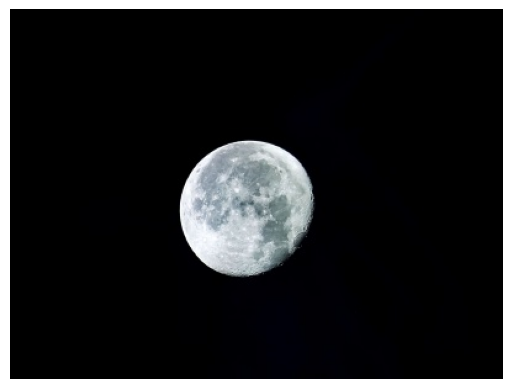

In [2]:


# Load an image from file
moon = cv.imread('./images/moon.jpg')

# Display the image using matplotlib
plt.imshow(cv.cvtColor(moon, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


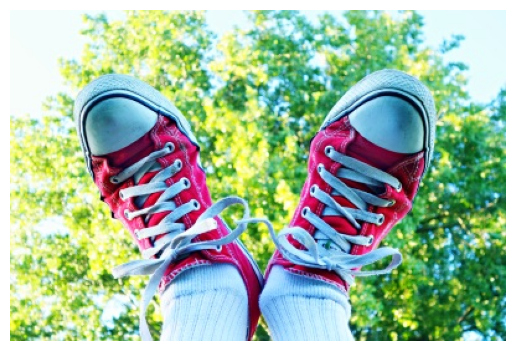

In [3]:
# Load an image from file
sneakers = cv.imread('./images/sneakers.jpg')

# Display the image using matplotlib
plt.imshow(cv.cvtColor(sneakers, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


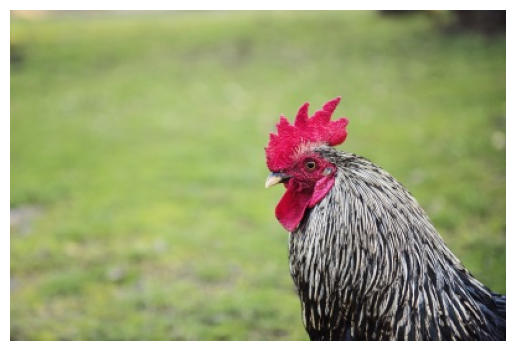

In [4]:
# Load an image from file
rooster = cv.imread('./images/rooster.jpg')

# Display the image using matplotlib
plt.imshow(cv.cvtColor(rooster, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
rooster1 = cv.cvtColor(rooster, cv.COLOR_BGR2RGB)

In [5]:
#converting images to numpy arrays
# Convert the image to a NumPy array
rooster_array = np.array(rooster)
moon_array = np.array(moon)
sneakers_array = np.array(sneakers)
# Now you can work with the NumPy array
# For example, you can print the shape of the array
print("Shape of the rooster array:", rooster_array.shape)
print("Shape of the moon array:", moon_array.shape)
print("Shape of the sneakers array:", sneakers_array.shape)



Shape of the rooster array: (267, 400, 3)
Shape of the moon array: (300, 400, 3)
Shape of the sneakers array: (267, 400, 3)


In [6]:
#Just an example of working with images
print(rooster_array[200][150][0], "blue")
print(rooster_array[200][150][1], "green")
print(rooster_array[200][150][2], "red")
rooster1_array = np.array(rooster1)
print(rooster1_array[200][150][0], "blue")
print(rooster1_array[200][150][1], "green")
print(rooster1_array[200][150][2], "red")

123 blue
185 green
179 red
179 blue
185 green
123 red


In [7]:
#images have been read and the image matrices extracted for you

In [8]:
#implement the convolution function
def convolution(image, kernel):
    
    
    image_height,image_width,image_third = image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width,image_third))
    for i in range(output_height):
        for j in range(output_width):
            for k in range(image_third):
        
                image_patch = image[i:i + kernel_height, j:j + kernel_width,k]
                output[i, j] = np.sum(image_patch * kernel)

    return output



In [9]:
def identity_filter(size):
    if size % 2 == 0:
        raise ValueError("Size must be an odd number for the identity filter.")
    
    identity = np.zeros((size, size))
    center = size // 2
    identity[center, center] = 1.0

    return identity


In [10]:
# mean blur
def mean_blur(image, kernel_size):
    kernel= np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    blurred_image = convolution(image, kernel)

    return blurred_image

In [11]:
def sharpen_image(image, kernel_size):
    kernel = 2*identity_filter(kernel_size)-np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    sharpened_image=convolution(image,kernel)
    return sharpened_image

In [20]:
def erode_image(image):
    
    image_height, image_width, image_channels = image.shape
    padding = 1
    padded_image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')
    result = np.zeros((image_height,image_width,image_channels))
    for h in range(image_height):
        for w in range(image_width):
            for i in range(3):
                temp=padded_image[h:h+3,w:w+3,i]
                result[h,w,i]=np.min(temp)
    return result.astype(np.uint8)   

In [13]:
def dilate_image(image):
    
    image_height, image_width, image_channels = image.shape
    padding = 1
    padded_image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')
    result = np.zeros((image_height,image_width,image_channels))
    for h in range(image_height):
        for w in range(image_width):
            for i in range(3):
                temp=padded_image[h:h+3,w:w+3,i]
                result[h,w,i]=np.max(temp)
    return result.astype(np.uint8)   

In [14]:
#horizontal edge detection
def edge_detect(image, kernel_size):
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd number")
    
    edgeh_kernel = np.zeros((kernel_size, kernel_size))
    edgeh_kernel[0, :] = 1
    edgeh_kernel[kernel_size-1, :] = -1
        
        
    edgeh_image=convolution(image,edgeh_kernel)
    return edgeh_image

In [21]:
#rooster
rooster_blur = mean_blur(rooster_array, 3)
rooster_edges = edge_detect(rooster, 7)
rooster_sharpen = sharpen_image(rooster_array, 5)
rooster_erode = erode_image(rooster_array)
rooster_dilate = dilate_image(rooster_array)

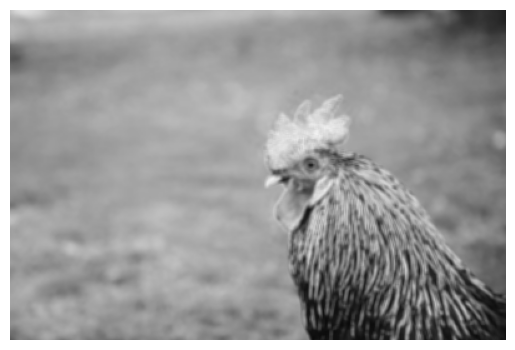

In [16]:
rooster_blur = rooster_blur.astype(np.uint8)
rgb_array = cv.cvtColor(rooster_blur, cv.COLOR_BGR2RGB)
#Rooster blur
# Display the RGB array using Matplotlib
plt.imshow(rgb_array)
plt.axis('off')
plt.show()

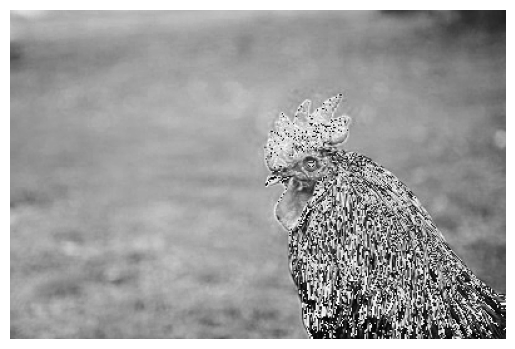

In [17]:
rooster_sharpen = rooster_sharpen.astype(np.uint8)
rgb_array = cv.cvtColor(rooster_sharpen, cv.COLOR_BGR2RGB)
#Rooster sharpen
# Display the RGB array using Matplotlib
plt.imshow(rgb_array)
plt.axis('off')
plt.show()

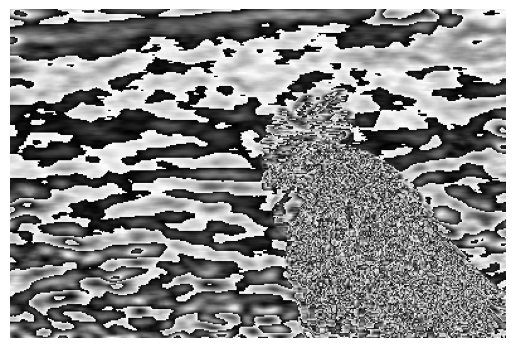

In [18]:
rooster_edges = rooster_edges.astype(np.uint8)
rgb_array = cv.cvtColor(rooster_edges, cv.COLOR_BGR2RGB)
#Rooster edges
# Display the RGB array using Matplotlib
plt.imshow(rgb_array)
plt.axis('off')
plt.show()

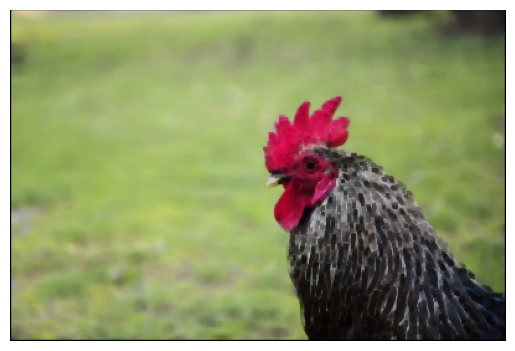

In [22]:
rooster_erode = rooster_erode.astype(np.uint8)
rgb_array = cv.cvtColor(rooster_erode, cv.COLOR_BGR2RGB)
#Rooster erode
# Display the RGB array using Matplotlib
plt.imshow(rgb_array)
plt.axis('off')
plt.show()

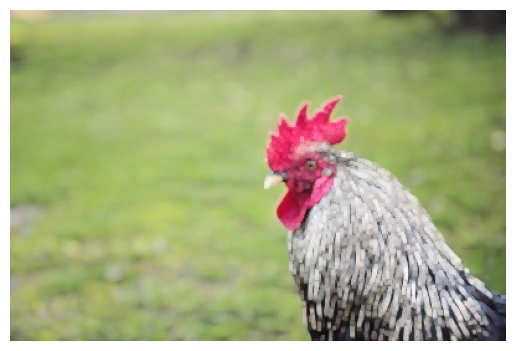

In [19]:
rooster_dilate = rooster_dilate.astype(np.uint8)
rgb_array = cv.cvtColor(rooster_dilate, cv.COLOR_BGR2RGB)
#Rooster dilate
# Display the RGB array using Matplotlib
plt.imshow(rgb_array)
plt.axis('off')
plt.show()